**Description** : 

“Explore the intricacies of social media sentiment analysis with this comprehensive Python guide. This notebook covers the complete process from data preparation, sentiment analysis, trend visualization, to report generation using real-world social media data. Ideal for developers and data analysts, this project demonstrates how to leverage the power of Python and NLTK to extract and visualize insights from social media platforms.”

**Introduction**

Social media sentiment analysis is a powerful tool to gauge public opinion on various topics, products, or services. By categorizing sentiments into positive, negative, and neutral, businesses and researchers can make data-driven decisions. This notebook provides a step-by-step guide to analyzing social media sentiment data using Python.

**Dataset Information**

The dataset used in this analysis contains social media sentiment data from various platforms. Each entry includes:

- **New_Date**: The date and time of the social media post.
- **clean_tweet**: The cleaned text of the social media post.
- **sentiment**: The sentiment label (positive, negative, neutral) assigned to each post.
The dataset is available at: Social Media Sentiment Data.

## Steps Included in the Notebook

 **Data Preparation**
- **Loading the Data**: Import data from a CSV file.
- **Handling Missing Values**: Identify and handle missing values.
- **Date Conversion**: Ensure the date column is in datetime format.
- **Index Setting**: Set the date column as the index.
- **Text Data Cleaning**: Preprocess text data for sentiment analysis.

In [5]:
import pandas as pd

# Load the dataset with a different encoding
data_url = r"/kaggle/input/social-media-sentiment-analysis-dataset/social_media_sentimate_data.csv"
df_sentiments = pd.read_csv(data_url, encoding='ISO-8859-1')

# Print the first few rows to verify the column names
print(df_sentiments.head())

# Check for missing values
print(df_sentiments.isnull().sum())

# Drop rows with missing values in 'New_Date' and 'clean_tweet' columns
df_sentiments.dropna(subset=['New_Date', 'clean_tweet'], inplace=True)

# Convert 'New_Date' column to datetime using a specific format
df_sentiments['New_Date'] = pd.to_datetime(df_sentiments['New_Date'], format='%d-%m-%Y')

# Set 'New_Date' as the index
df_sentiments.set_index('New_Date', inplace=True)

# Display the prepared data
print(df_sentiments.head())


                        Date  \
0  2023-04-08 03:31:08+00:00   
1  2023-04-08 03:30:51+00:00   
2  2023-04-08 03:30:00+00:00   
3  2023-04-08 03:28:59+00:00   
4  2023-04-08 03:28:31+00:00   

                                               Tweet  \
0  OpenAIâs GPT-4 Just Got Supercharged! #ai #C...   
1  "Classical art" is struggling - not changed th...   
2  Alibaba invites businesses to trial 'ChatGPT r...   
3  Trying to stop students from using #AI and #ch...   
4  I Asked ChatGPT's AI Chatbot How Can I Earn Cr...   

                                                 Url            User  \
0  https://twitter.com/tubeblogger/status/1644543...     tubeblogger   
1  https://twitter.com/majorradic/status/16445432...      majorradic   
2  https://twitter.com/gadgetsnow/status/16445430...      gadgetsnow   
3  https://twitter.com/Sherab_Taye/status/1644542...     Sherab_Taye   
4  https://twitter.com/cryptoccentral/status/1644...  cryptoccentral   

                 UserCreated  UserVer

# Sentiment Analysis
- **Sentiment Analysis**: Use NLTK’s VADER sentiment analyzer to categorize sentiments.

                        Date  \
0  2023-04-08 03:31:08+00:00   
1  2023-04-08 03:30:51+00:00   
2  2023-04-08 03:30:00+00:00   
3  2023-04-08 03:28:59+00:00   
4  2023-04-08 03:28:31+00:00   

                                               Tweet  \
0  OpenAIâs GPT-4 Just Got Supercharged! #ai #C...   
1  "Classical art" is struggling - not changed th...   
2  Alibaba invites businesses to trial 'ChatGPT r...   
3  Trying to stop students from using #AI and #ch...   
4  I Asked ChatGPT's AI Chatbot How Can I Earn Cr...   

                                                 Url            User  \
0  https://twitter.com/tubeblogger/status/1644543...     tubeblogger   
1  https://twitter.com/majorradic/status/16445432...      majorradic   
2  https://twitter.com/gadgetsnow/status/16445430...      gadgetsnow   
3  https://twitter.com/Sherab_Taye/status/1644542...     Sherab_Taye   
4  https://twitter.com/cryptoccentral/status/1644...  cryptoccentral   

                 UserCreated  UserVer

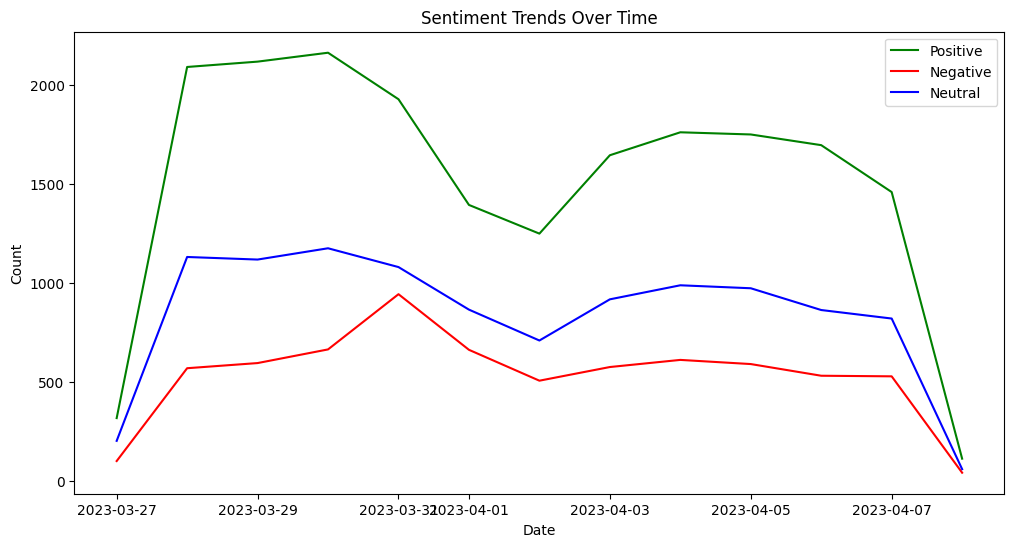

In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import warnings

# Suppress warnings (including the one about twython)
warnings.filterwarnings("ignore")

# Load the dataset with a different encoding
data_url = r"/kaggle/input/social-media-sentiment-analysis-dataset/social_media_sentimate_data.csv"
df_sentiments = pd.read_csv(data_url, encoding='ISO-8859-1')

# Print the first few rows to verify the column names
print(df_sentiments.head())

# Check for missing values
print(df_sentiments.isnull().sum())

# Drop rows with missing values in 'New_Date' and 'clean_tweet' columns
df_sentiments.dropna(subset=['New_Date', 'clean_tweet'], inplace=True)

# Convert 'New_Date' column to datetime using dayfirst parameter
df_sentiments['New_Date'] = pd.to_datetime(df_sentiments['New_Date'], dayfirst=True)

# Set 'New_Date' as the index
df_sentiments.set_index('New_Date', inplace=True)

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
df_sentiments['sentiment_scores'] = df_sentiments['clean_tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

# Extract compound score
df_sentiments['compound_score'] = df_sentiments['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Categorize sentiments based on compound score
df_sentiments['sentiment'] = df_sentiments['compound_score'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral')
)

# Print the sentiment analysis results
print(df_sentiments[['clean_tweet', 'compound_score', 'sentiment']].head())

# Resample data to daily sentiment counts
df_daily_sentiments = pd.DataFrame(index=pd.date_range(start=df_sentiments.index.min(), end=df_sentiments.index.max()))
df_daily_sentiments['positive'] = df_sentiments[df_sentiments['sentiment'] == 'positive'].resample('D').size()
df_daily_sentiments['negative'] = df_sentiments[df_sentiments['sentiment'] == 'negative'].resample('D').size()
df_daily_sentiments['neutral'] = df_sentiments[df_sentiments['sentiment'] == 'neutral'].resample('D').size()

# Fill NaN values with 0 to represent days with no sentiments
df_daily_sentiments.fillna(0, inplace=True)

# Plot sentiment trends
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sentiments.index, df_daily_sentiments['positive'], label='Positive', color='g')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['negative'], label='Negative', color='r')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['neutral'], label='Neutral', color='b')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


# Trend Visualization
- **Trend Visualization**: Aggregate sentiment counts on a daily basis and plot the trends over time.

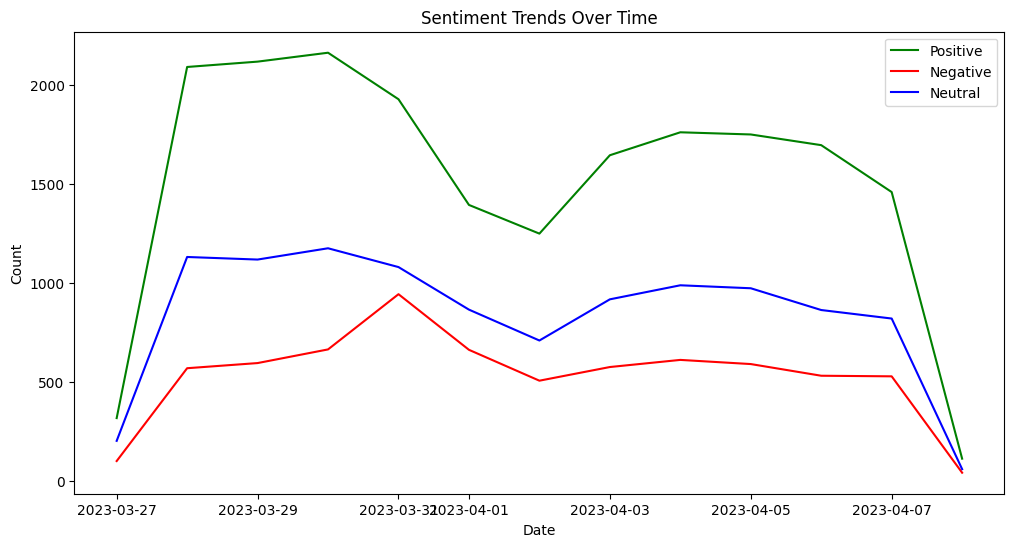

In [10]:
import matplotlib.pyplot as plt

# Resample data to daily sentiment counts
# Initialize an empty DataFrame to store daily sentiment counts
df_daily_sentiments = pd.DataFrame(index=pd.date_range(start=df_sentiments.index.min(), end=df_sentiments.index.max()))

# Aggregate sentiment counts by day
df_daily_sentiments['positive'] = df_sentiments[df_sentiments['sentiment'] == 'positive'].resample('D').size()
df_daily_sentiments['negative'] = df_sentiments[df_sentiments['sentiment'] == 'negative'].resample('D').size()
df_daily_sentiments['neutral'] = df_sentiments[df_sentiments['sentiment'] == 'neutral'].resample('D').size()

# Fill NaN values with 0 to represent days with no sentiments
df_daily_sentiments.fillna(0, inplace=True)

# Plot sentiment trends
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sentiments.index, df_daily_sentiments['positive'], label='Positive', color='g')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['negative'], label='Negative', color='r')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['neutral'], label='Neutral', color='b')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

## Report Generation
- **Report Generation**: Summarize the data and export results to CSV files and save sentiment trend plots.

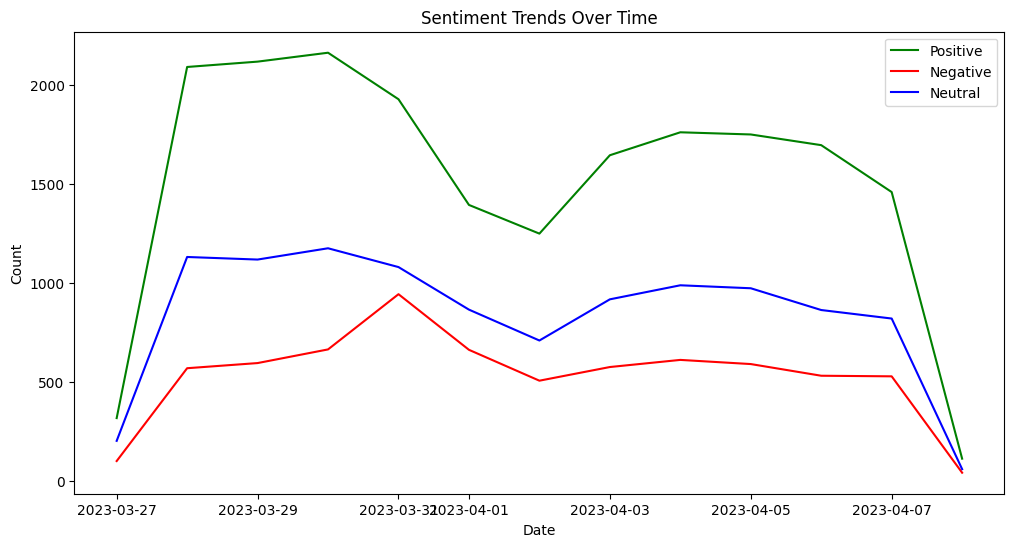

Report generated: 'sentiment_summary.csv' and 'sentiment_trends.png'


In [11]:
# Summarize data
sentiment_summary = df_daily_sentiments.describe()

# Generate plots and save them
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sentiments.index, df_daily_sentiments['positive'], label='Positive', color='g')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['negative'], label='Negative', color='r')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['neutral'], label='Neutral', color='b')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.savefig('sentiment_trends.png')
plt.show()

# Export summarized data to CSV
sentiment_summary.to_csv('sentiment_summary.csv')

print("Report generated: 'sentiment_summary.csv' and 'sentiment_trends.png'")

**Conclusion** 

This notebook provides a comprehensive guide to analyzing social media sentiments using Python. By following these steps, you can effectively prepare data, perform sentiment analysis, visualize trends, and generate insightful reports. This structured approach ensures you cover all essential aspects of sentiment analysis and make data-driven decisions based on the findings.
